
# Project: Investigate a Dataset (no show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

* Gender: Male or Female . 
* Age: How old is the patient.
* Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* Hipertension: True or False
* Diabetes: True or False
* Alcoholism: True or False
* Handcap: True or False
* SMS_received: 1 or more messages sent to the patient.
* No-show: True or False.

## research Questions:
* What is the most factor to affect the show of the patient to the appointment?
* is there a specific day that has more no show patients than the other days?
* what are the percentage of the showed and not showed patients?

In [3]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


## Assessing

In [4]:
# Loading the data set
df = pd.read_csv("noshowappointments.csv")

In [5]:
#Exploring the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#looking at the shape to know if there is missing values or no
df.shape

(110527, 14)

In [7]:
#checking the info of the columns to know whether there is missing values or no
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#checking the statistics information about each column 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
#checking the age problem in the minimum value
df.groupby(['Age']).min().head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Age,,,,,,,,,,,,,
-1,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,ROMÃO,0,0,0,0,0,0,No
0,2.699191e+08,5317393,F,2016-02-02T13:15:00Z,2016-04-29T00:00:00Z,ANDORINHAS,0,0,0,0,0,0,No
1,8.688158e+08,5303666,F,2016-01-29T08:41:23Z,2016-04-29T00:00:00Z,ANDORINHAS,0,0,0,0,0,0,No
2,9.528125e+08,5216818,F,2016-01-05T10:57:59Z,2016-04-29T00:00:00Z,ANDORINHAS,0,0,0,0,0,0,No
3,8.799645e+07,5227376,F,2016-01-07T12:47:54Z,2016-04-29T00:00:00Z,ANDORINHAS,0,0,0,0,0,0,No


In [10]:
#knowing the number of the age below or equal to 0
df[df['Age'] <= 0].shape

(3540, 14)

In [11]:
#exploring the number of the handcap values above 1
df[df['Handcap'] >1 ].shape

(199, 14)

In [12]:
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
32299,6.618868e+12,5677718,F,2016-05-10T07:33:42Z,2016-05-10T00:00:00Z,53,CENTRO,0,0,0,0,0,0,No
44488,8.537457e+13,5701699,F,2016-05-16T10:53:00Z,2016-05-24T00:00:00Z,8,REPÚBLICA,0,0,0,0,0,1,Yes
108622,7.125280e+13,5785768,M,2016-06-08T07:38:38Z,2016-06-08T00:00:00Z,72,BELA VISTA,0,1,0,0,0,0,No
18556,8.687145e+12,5665260,M,2016-05-05T14:10:34Z,2016-05-05T00:00:00Z,65,MARIA ORTIZ,0,0,0,0,0,0,No
23422,1.178718e+12,5685604,F,2016-05-11T10:43:42Z,2016-05-20T00:00:00Z,62,CONSOLAÇÃO,0,0,0,0,0,0,No


## issues:
* some columns like (Hipertension, Handcap) have wrong names
* columns that doesn't help in the analysis (PatientId, AppointmentID, ScheduledDay, AppointmentDay)
* there is some age values equal to 0 or below 0
* handcap should be either true or false, so either 1 or 0 but there is 2,3,4 
* No_show column is confusing
* AppointmentDay is not datetime format

## Data Cleaning 

In [13]:
#making a copy from the original data to clean
df_cleaned = df.copy()

#### issue
* fixing wrong columns name

#### code

In [14]:
#Renaiming the Columns that needs to be remained
df_cleaned.rename(columns = {'Hipertension':'Hypertension','Handcap': 'Handicap','No-show':'Showed'}, inplace=True)

##### test

In [15]:
df_cleaned.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Showed'],
      dtype='object')

#### Issue
* dropping the unwanted columns

##### code

In [16]:
#dropping the unnecessary columns
df_cleaned.drop(['PatientId','AppointmentID', 'ScheduledDay'], axis = 1,inplace = True)

##### test

In [17]:
#checking the data after dropping the columns
df_cleaned.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### issue
* AppointmentDay is not datetime format 

#### code

In [18]:
#Converting AppointmentDay into Datetime
df_cleaned['AppointmentDay'] = pd.to_datetime(df_cleaned['AppointmentDay'], errors='coerce')

In [19]:
#extracting the weekday from the AppointmentDay
df_cleaned['AppointmentDay'] = df_cleaned['AppointmentDay'].dt.weekday_name

#### test

In [20]:
df_cleaned.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed
0,F,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
Showed            110527 non-null object
dtypes: int64(7), object(4)
memory usage: 9.3+ MB


#### issue 
* changing the unreal age values to the main of the age column

##### code

In [22]:
#replacing the age values that is not real with the mean of age
df_cleaned['Age'].replace([0,-1],df_cleaned['Age'].mean(), inplace = True)

##### test

In [23]:
#checking the age after cleaning the unreal data
df_cleaned.groupby(['Age']).min().head()

,Gender,AppointmentDay,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed
Age,,,,,,,,,,
1.0,F,Friday,ANDORINHAS,0,0,0,0,0,0,No
2.0,F,Friday,ANDORINHAS,0,0,0,0,0,0,No
3.0,F,Friday,ANDORINHAS,0,0,0,0,0,0,No
4.0,F,Friday,ANDORINHAS,0,0,0,0,0,0,No
5.0,F,Friday,ANDORINHAS,0,0,0,0,0,0,No


#### issue
* changing the value of handcap above 1 to 1 

##### code

In [24]:
#replace the wrong handcap data, it should be 1 or 0 
df_cleaned['Handicap'].replace([2,3,4], 1, inplace = True)

##### test

In [25]:
#checking the data after replacing the handcap unreal data
df_cleaned[df_cleaned['Handicap'] >1 ] 

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed


#### issue
* chaging the values to of each disease and the showed column to True and False

##### code

In [26]:
# changing the values of yes and no to False and True, to be matched with the new column name
# changing the 1,0 values to True and False
df_cleaned['Showed'].replace(['Yes','No'],['False','True'], inplace = True)
df_cleaned['Scholarship'].replace([1,0],['True','False'], inplace = True)
df_cleaned['Hypertension'].replace([1,0],['True','False'], inplace = True)
df_cleaned['Diabetes'].replace([1,0],['True','False'], inplace = True)
df_cleaned['Alcoholism'].replace([1,0],['True','False'], inplace = True)
df_cleaned['Handicap'].replace([1,0],['True','False'], inplace = True)
df_cleaned['SMS_received'].replace([1,0],['True','False'], inplace = True)

##### test

In [27]:
df_cleaned.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed
0,F,Friday,62.0,JARDIM DA PENHA,False,True,False,False,False,False,True
1,M,Friday,56.0,JARDIM DA PENHA,False,False,False,False,False,False,True
2,F,Friday,62.0,MATA DA PRAIA,False,False,False,False,False,False,True
3,F,Friday,8.0,PONTAL DE CAMBURI,False,False,False,False,False,False,True
4,F,Friday,56.0,JARDIM DA PENHA,False,True,True,False,False,False,True


In [29]:
#makign showed column for the patients who showed in the appointment
df_cleaned['showed'] = df_cleaned.Showed == 'True'

In [30]:
#making showed variable with the patients that showed in the appointment
showed = df_cleaned.Showed == 'True'

In [31]:
#makign not_showed column for the patients who didn't show in the appointment
df_cleaned['not_showed'] = df_cleaned.Showed == 'False'

In [32]:
#makign not_showed variable for the patients who didn't show in the appointment
not_showed = df_cleaned.Showed == 'False'

In [33]:
#dropping the unneeded column Showed
df_cleaned.drop(['Showed'],axis = 1, inplace=True)

In [34]:
#the average not_showed patients
df_cleaned.not_showed.mean()

0.20193255946510807

In [35]:
#the average showed patients
df_cleaned.showed.mean()

0.79806744053489198

In [36]:
df_cleaned.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,showed,not_showed
0,F,Friday,62.0,JARDIM DA PENHA,False,True,False,False,False,False,True,False
1,M,Friday,56.0,JARDIM DA PENHA,False,False,False,False,False,False,True,False
2,F,Friday,62.0,MATA DA PRAIA,False,False,False,False,False,False,True,False
3,F,Friday,8.0,PONTAL DE CAMBURI,False,False,False,False,False,False,True,False
4,F,Friday,56.0,JARDIM DA PENHA,False,True,True,False,False,False,True,False


<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: What is the most factor to affect the show of the patient to the appointment?

the Gender doesn't seem to affect the showing of the patient


Gender
F    0.796854
M    0.800321
Name: showed, dtype: float64

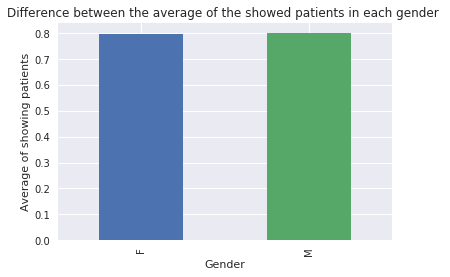

In [54]:
df_cleaned.groupby(['Gender'])['showed'].mean().plot(kind='bar');
plt.xlabel('Gender')
plt.ylabel('Average of showing patients')
plt.title('Difference between the average of the showed patients in each gender ')
df_cleaned.groupby(['Gender'])['showed'].mean()
print("the Gender doesn't seem to affect the showing of the patient" )
df_cleaned.groupby(['Gender'])['showed'].mean()

the Age seems to affect the showing of the patient
mean Age that Showed is: 39.01
mean Age that Not_showed is: 35.38


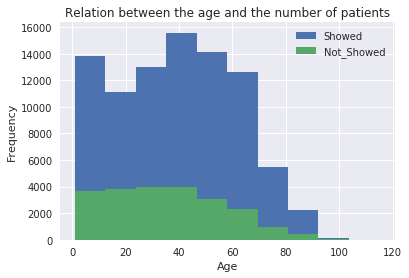

In [55]:
df_cleaned.Age[showed].hist();
df_cleaned.Age[not_showed].hist();
plt.legend(['Showed', 'Not_Showed'])
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.title('Relation between the age and the number of patients');
print("the Age seems to affect the showing of the patient" )
print('mean Age that Showed is: {:.2f}'.format(df_cleaned.Age[showed].mean()))
print('mean Age that Not_showed is: {:.2f}'.format(df_cleaned.Age[not_showed].mean()))

the Scholarship doesn't affect the showing of the patient as patients who have and doesn't have Scholarship tends to show in the appointment


Scholarship
False    0.801928
True     0.762637
Name: showed, dtype: float64

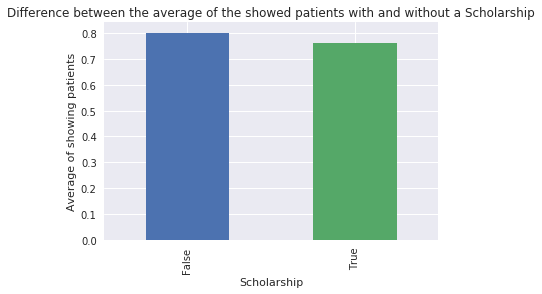

In [56]:
df_cleaned.groupby(['Scholarship'])['showed'].mean().plot(kind='bar');
plt.xlabel('Scholarship')
plt.ylabel('Average of showing patients')
plt.title('Difference between the average of the showed patients with and without a Scholarship')
df_cleaned.groupby(['Scholarship'])['showed'].mean()
print("the Scholarship doesn't affect the showing of the patient as patients who have and doesn't have Scholarship tends to show in the appointment")
df_cleaned.groupby(['Scholarship'])['showed'].mean()

the Hypertension doesn't affect the showing of the patient as patients who have and doesn't have Hypertension tends to show in the appointment


Hypertension
False    0.790963
True     0.826980
Name: showed, dtype: float64

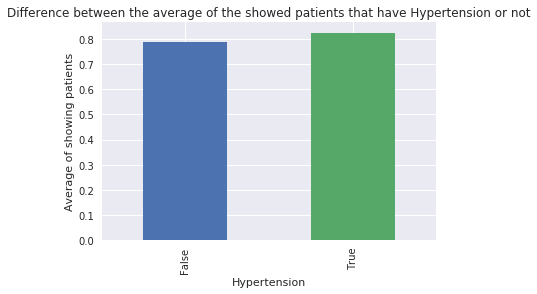

In [57]:
df_cleaned.groupby(['Hypertension'])['showed'].mean().plot(kind='bar');
plt.xlabel('Hypertension')
plt.ylabel('Average of showing patients')
plt.title('Difference between the average of the showed patients that have Hypertension or not')
df_cleaned.groupby(['Hypertension'])['showed'].mean()
print("the Hypertension doesn't affect the showing of the patient as patients who have and doesn't have Hypertension tends to show in the appointment")
df_cleaned.groupby(['Hypertension'])['showed'].mean()

the Diabetes doesn't seem to affect the showing of the patient as patients who have and doesn't have Diabetes tends to show in the appointment


Diabetes
False    0.796372
True     0.819967
Name: showed, dtype: float64

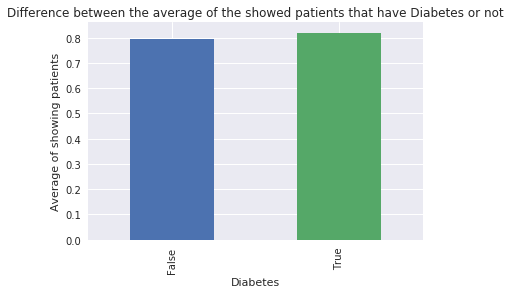

In [58]:
df_cleaned.groupby(['Diabetes'])['showed'].mean().plot(kind='bar');
plt.xlabel('Diabetes')
plt.ylabel('Average of showing patients')
plt.title('Difference between the average of the showed patients that have Diabetes or not')
df_cleaned.groupby(['Diabetes'])['showed'].mean()
print("the Diabetes doesn't seem to affect the showing of the patient as patients who have and doesn't have Diabetes tends to show in the appointment")
df_cleaned.groupby(['Diabetes'])['showed'].mean()

Alcoholism doesn't seem to affect the showing of the patient as patients who have and doesn't have Alcoholism tends to show in the appointment


Alcoholism
False    0.798054
True     0.798512
Name: showed, dtype: float64

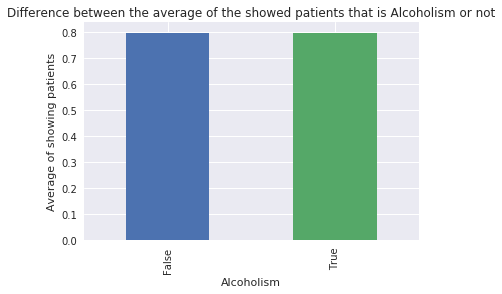

In [59]:
df_cleaned.groupby(['Alcoholism'])['showed'].mean().plot(kind='bar');
plt.xlabel('Alcoholism')
plt.ylabel('Average of showing patients')
plt.title('Difference between the average of the showed patients that is Alcoholism or not')
df_cleaned.groupby(['Alcoholism'])['showed'].mean()
print("Alcoholism doesn't seem to affect the showing of the patient as patients who have and doesn't have Alcoholism tends to show in the appointment")
df_cleaned.groupby(['Alcoholism'])['showed'].mean()

Handicap doesn't seem to affect the showing of the patient as patients who have and doesn't have Handicap tends to show in the appointment


Handicap
False    0.797647
True     0.818385
Name: showed, dtype: float64

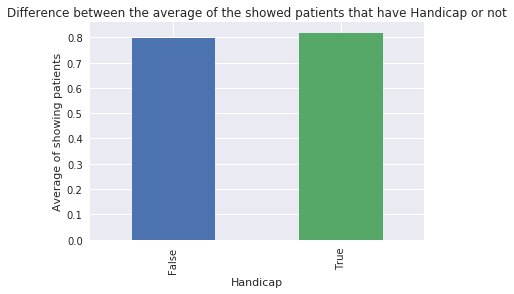

In [60]:
df_cleaned.groupby(['Handicap'])['showed'].mean().plot(kind='bar');
plt.xlabel('Handicap')
plt.ylabel('Average of showing patients')
plt.title('Difference between the average of the showed patients that have Handicap or not')
df_cleaned.groupby(['Handicap'])['showed'].mean()
print("Handicap doesn't seem to affect the showing of the patient as patients who have and doesn't have Handicap tends to show in the appointment")
df_cleaned.groupby(['Handicap'])['showed'].mean()

Receiving sms doesn't seem to affect the showing of the patient as patients who recieved and didn't recieve sms tends to show in the appointment


SMS_received
False    0.832967
True     0.724255
Name: showed, dtype: float64

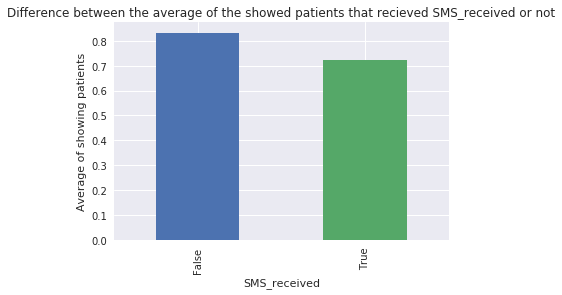

In [61]:
df_cleaned.groupby(['SMS_received'])['showed'].mean().plot(kind='bar');
plt.xlabel('SMS_received')
plt.ylabel('Average of showing patients')
plt.title('Difference between the average of the showed patients that recieved SMS_received or not')
df_cleaned.groupby(['SMS_received'])['showed'].mean()
print("Receiving sms doesn't seem to affect the showing of the patient as patients who recieved and didn't recieve sms tends to show in the appointment")
df_cleaned.groupby(['SMS_received'])['showed'].mean()

### Question 2: is there a specific day that has more no show patients than the other days?

Saturday is the most day that has no show patients than the others


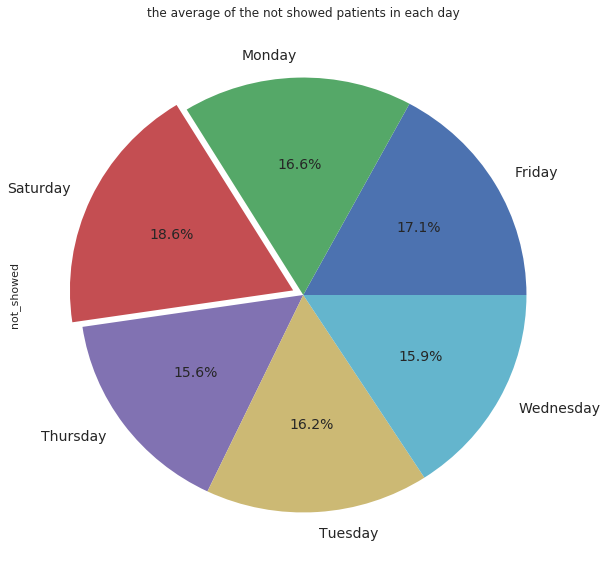

In [62]:
df_cleaned.groupby(['AppointmentDay'])['not_showed'].mean().plot(kind='pie',autopct='%1.1f%%',fontsize = 14, figsize=(10,10),explode=(0,0,.05,0,0,0));
plt.title('the average of the not showed patients in each day');
df_cleaned.groupby(['AppointmentDay'])['not_showed'].mean();
print('Saturday is the most day that has no show patients than the others')

### Question 3: what are the percentage of the showed and not showed patients?

Percentage of showed patients is: 79.81%
Percentage of not_showed patients is: 20.19%


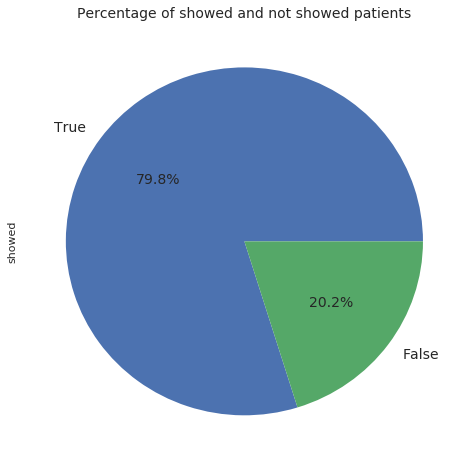

In [74]:
df_cleaned['showed'].value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize = 14, figsize=(8,8));
plt.title('Percentage of showed and not showed patients',fontsize = 14);
print("Percentage of showed patients is: {:.2f}{}".format(df_cleaned['showed'].mean()*100,"%"))
print("Percentage of not_showed patients is: {:.2f}{}".format(df_cleaned['not_showed'].mean()*100,"%"))

<a id='conclusions'></a>
## Conclusions
* the data provided had some issues with the age as it has age equal to and below 0 and it's not a real age so i replaced these values by the average age of the dataset

* some columns was confusing like 'No_show' column so i renamed it to 'showed' and then seperated it to two columns 'showed' and 'not_showed'

* 'Handcap' and 'Hipertension' are not right names so I changed it to appropriate names

* the handicap column must be either True or False, but it has values form 0 to 4, so I changed the values above 1 to 1

* the percentage of the showed patients is 79.8% and the not showed is 20.2%

* the most term that affect if the patient will go to the appointment or not is the age 

* patients that have scholarship tends to miss the appointment with the percentage of 76.2% and the patients that doesn't have a scholarship tends to miss their appointment also with the percentage of 80.2%, so the scholarship isn't crusial about the patient attend the appointment or not

* patients that recieved a sms tends to miss their appointment with the percentage of 72.4% and the patients that didn't recieve a sms tends to also miss their appointment with the percentage of 83.3%, so the sms isn't crusial about the patient attend the appointment or not

* as shown in visualization, Saturday is the most day that has no show patients than the others




In [75]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0